In [1]:
pip install opencv-python==4.5.5.64


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


In [2]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append(r"/content/drive/MyDrive/")

Mounted at /content/drive


In [3]:
# import the necessary packages
from loader_util.projects.siamese import config
from loader_util.projects.siamese import utils
from tensorflow.keras.models import load_model
from imutils.paths import list_images
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import numpy as np
import cv2

In [4]:
# script constants
examples_dir = r"/content/drive/MyDrive/Colab Notebooks/pyimagesearch/projects/siamese_networks_101/examples"
saved_model_path = r"/content/drive/MyDrive/Colab Notebooks/pyimagesearch/projects/siamese_networks_101/output/siamese_model"

In [5]:
# grab the test dataset image paths and then randomly generate a
# total of 10 image pairs
print("[INFO] loading test dataset...")
test_image_paths = list(list_images(examples_dir))

np.random.seed(42)
# randomly generate a total of 10 pair of image paths
image_path_pairs = np.random.choice(test_image_paths, size=(10, 2))

# load the model from disk
print("[INFO] loading siamese model...")
model = load_model(saved_model_path)

[INFO] loading test dataset...
[INFO] loading siamese model...


1/1 [==============================] - 8s 8s/step


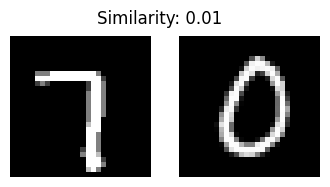

1/1 [==============================] - 0s 20ms/step


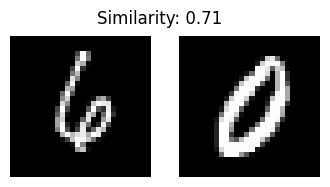

1/1 [==============================] - 0s 21ms/step


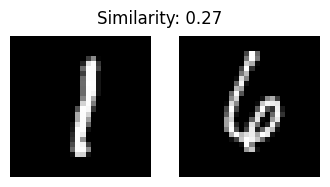

1/1 [==============================] - 0s 20ms/step


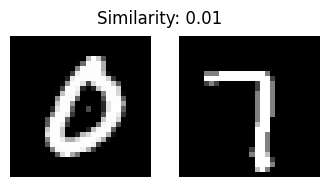

1/1 [==============================] - 0s 20ms/step


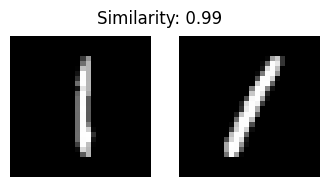

1/1 [==============================] - 0s 26ms/step


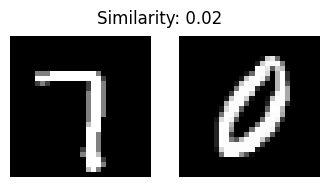

1/1 [==============================] - 0s 26ms/step


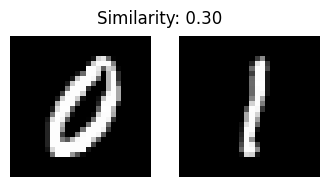

1/1 [==============================] - 0s 28ms/step


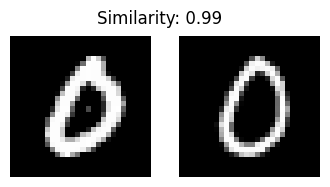

1/1 [==============================] - 0s 29ms/step


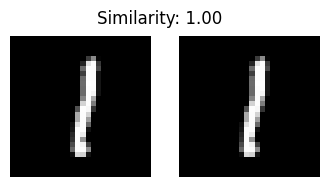

1/1 [==============================] - 0s 19ms/step


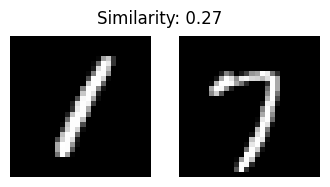

In [7]:
# loop over all image path pairs
for i, (patha, pathb) in enumerate(image_path_pairs):
    imagea = cv2.imread(patha, 0)
    imageb = cv2.imread(pathb, 0)

    # create a copy of both the images for visualization purpose
    origa = imagea.copy()
    origb = imageb.copy()

    # add channel a dimension to both the images
    imagea = np.expand_dims(imagea, axis=-1)
    imageb = np.expand_dims(imageb, axis=-1)

    # add a batch dimension to both images
    imagea = np.expand_dims(imagea, axis=0)
    imageb = np.expand_dims(imageb, axis=0)

    # scale the pixel values to the range of [0, 1]
    imagea = imagea / 255.0
    imageb = imageb / 255.0

    # use our siamese model to make predictions on the image pair,
    # indicating whether or not the images belong to the same class
    preds = model.predict([imagea, imageb])
    proba = preds[0][0]

    # initialize the figure
    fig = plt.figure("Pair #{}".format(i + 1), figsize=(4, 2))
    plt.suptitle("Similarity: {:.2f}".format(proba))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(origa, cmap=plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(origb, cmap=plt.cm.gray)
    plt.axis("off")

    # show the plot
    plt.show()
